In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2
from sklearn.datasets import make_blobs

In [5]:
m1 = np.array([0., 15.])
m2 = np.array([3., .5])
m3 = np.array([9., 9])
cov = np.array([[5.0,0.0],
                [0.0, 3.0]])
d1 = np.random.multivariate_normal(m1, cov, 250)
d2 = np.random.multivariate_normal(m2, cov, 250)
d3 = np.random.multivariate_normal(m3, cov, 250)

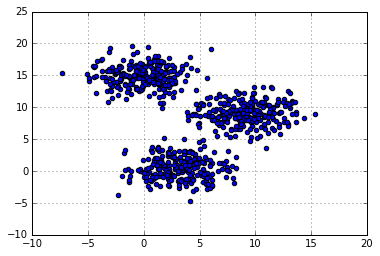

In [9]:
plt.figure(0)
plt.grid("on")
plt.scatter(d1[:, 0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])
plt.scatter(d3[:, 0], d3[:, 1])
plt.show()

# Clustering

1. Get data X

2. Set no. of dimensions k

3. Generate random points - Cluster centers

4. Get distance of every cluster point to a, b, c

5. Assign points to cluster of min distance


6. take cluster centroid as new points

7. Repeat steps 4-6 untill point changes negligibly

In [82]:
data_X, data_y = make_blobs(1000, 2, 3)
print data_X.shape, data_y.shape

(1000, 2) (1000,)


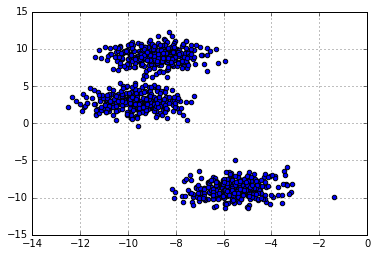

In [83]:
plt.figure(0)
plt.grid("on")
plt.scatter(data_X[:, 0], data_X[:, 1])
plt.show()

In [84]:
# Number of clusters
k = 3

# Generate random cluster centers
clusters = {}

colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']

for kx in range(k):
    cluster_id = kx
    points = []
    dim = data_X.shape[1]
    center = 10.0*(np.random.random((dim,))*2 - 1)
    color = colors[kx]
    clusters[cluster_id] = {
        'points': points,
        'center': center,
        'color': color
    }

print clusters

{0: {'color': 'red', 'points': [], 'center': array([-8.92464625, -6.27771463])}, 1: {'color': 'green', 'points': [], 'center': array([-3.34729701, -6.99310027])}, 2: {'color': 'blue', 'points': [], 'center': array([ 1.53743246, -7.82360685])}}


In [85]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [86]:
def clmean(train, k=3, i=5):
    for iX in range(i):
        # Allocate points to clusters
        for ix in range(train.shape[0]):
            # For each point, get distance with each cluster
            dist = []
            for kx in range(k):
                d = distance(train[ix], clusters[kx]['center'])
                dist.append(d)
            # Get cluster id where current point belongs
            c_id = np.argmin(dist)

            clusters[c_id]['points'].append(train[ix])
            
        for kx in range(k):
            pts = np.asarray(clusters[kx]['points'])
            if pts.shape[0] > 0:
                # Compute new cluster center
                new_center = pts.mean(axis=0)
            else:
                new_center = clusters[kx]['center']
            clusters[kx]['points'] = pts
            clusters[kx]['center'] = new_center
            
        plt.figure(0)


        for kx in range(k):
            cc = clusters[kx]['center']

            pts = clusters[kx]['points']
            try:
                plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
            except:
                pass

            plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')

            clusters[kx]['points'] = []

        plt.show()


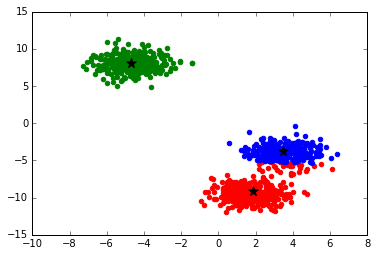

In [67]:
# Allocate points to clusters
for ix in range(data_X.shape[0]):
    # For each point, get distance with each cluster
    dist = []
    for kx in range(k):
        d = distance(data_X[ix], clusters[kx]['center'])
        dist.append(d)
    # Get cluster id where current point belongs
    c_id = np.argmin(dist)
    
    clusters[c_id]['points'].append(data_X[ix])

for kx in range(k):
    pts = np.asarray(clusters[kx]['points'])
    if pts.shape[0] > 0:
        # Compute new cluster center
        new_center = pts.mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['points'] = pts
    clusters[kx]['center'] = new_center

plt.figure(0)


for kx in range(k):
    cc = clusters[kx]['center']
    
    pts = clusters[kx]['points']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')
    
    clusters[kx]['points'] = []
plt.show()

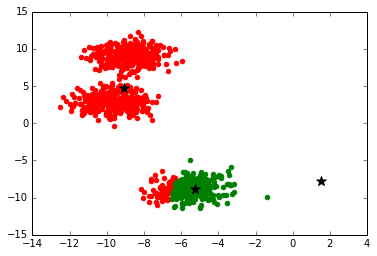

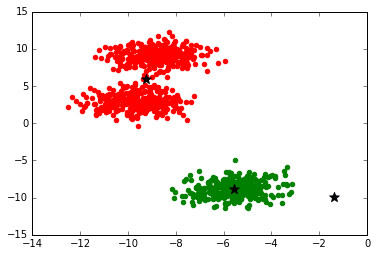

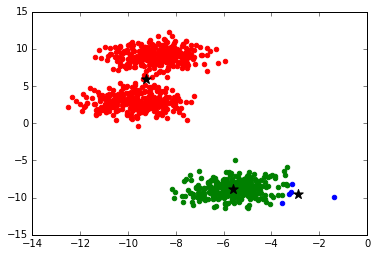

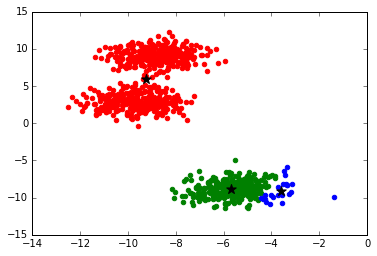

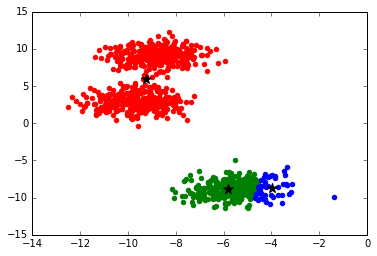

In [87]:
clmean(data_X, k=3, i=5)